In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import numpy as np

def gen_naca4digit_airfoil(m, p, t, c=1.0, n_points=100):
    """
    Note: this code generates (x,y) coordinates for the NACA 4-digit
    airfoil only.
    For other airfoils, you may want to do some search on obtaining similar
    formula.
    The overall idea is:
    - find a formula for the camberline distribution
    - find a formula for the thickness distribution
    - add thickness to the mean camberline.
    
    Usage:
          (x, y) = gen_naca4digit_airfoil(m, p, t, n_points=100)
    
    Parameters:
    m (float): maximum camber, as a fraction of the chord length
    p (float): location of maximum camber, as a fraction of the chord length
    t (float): maximum thickness, as a fraction of the chord length
    c (float): chord length
    n_points (int): number of points to generate on the airfoil
    
    Returns:
    x (numpy.array): array of x coordinates
    y (numpy.array): array of y coordinates
    """
    
    # Generate the x-coordinates
    x = np.linspace(0, c, n_points)
    
    # Calculate the camber line
    if p == 0:
        yc = np.zeros_like(x)
        dyc_dx = np.zeros_like(x)
    else:
        yc = np.where(x < p*c, m/p**2*(2*p*x/c - (x/c)**2), m/(1-p)**2*((1-2*p) + 2*p*x/c - (x/c)**2))
        dyc_dx = np.where(x < p*c, 2*m/p**2*(p - x/c), 2*m/(1-p)**2*(p - x/c))
    
    # Calculate the thickness distribution
    yt = 5*t*c*(0.2969*np.sqrt(x/c) - 0.1260*(x/c) - 0.3516*(x/c)**2 + 0.2843*(x/c)**3 - 0.1015*(x/c)**4)
    
    # Calculate the upper and lower surfaces
    xu = x - yt*np.sin(np.arctan(dyc_dx))
    yu = yc + yt*np.cos(np.arctan(dyc_dx))
    xl = x + yt*np.sin(np.arctan(dyc_dx))
    yl = yc - yt*np.cos(np.arctan(dyc_dx))
    
    # Combine the upper and lower surfaces
    x = np.concatenate((xu[::-1], xl[1:]))
    y = np.concatenate((yu[::-1], yl[1:]))
    
    return x, y


Text(0, 0.5, 'y')

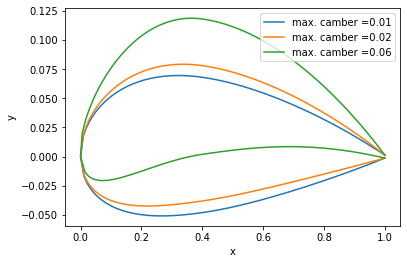

In [16]:
m = [0.01, 0.02, 0.06]   # maximum camber
p = 0.4    # location of maximum camber
t = 0.12   # maximum thickness
c = 1.0    # chord length
n_points = 100   # number of points to generate

for _ in m:
    x, y = gen_naca4digit_airfoil(_, p, t)
    plt.plot(x,y, label=f'max. camber ={_}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')